In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = {
    'Year': [2018, 2018, 2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024],
    'Course': ['Networking', 'Machine Learning', 'Networking', 'Machine Learning', 
               'Networking', 'Cyber Security', 'Machine Learning', 'Cyber Security',
               'Networking', 'Machine Learning', 'Networking', 'Machine Learning',
               'Networking', 'Machine Learning'],
    'Students': [120, 90, 150, 100, 160, 130, 180, 200, 220, 210, 230, 190, 180, 160],
    'FeePerStudent': [8000, 8500, 8500, 9000, 9000, 9500, 9500, 10000, 10000, 10500, 10500, 11000, 9500, 10000],
    'TotalRevenue': [960000, 765000, 1275000, 900000, 1440000, 1235000, 1710000, 2000000, 2200000, 2205000, 2415000, 2090000, 1710000, 1600000],
    'MarketingCost': [100000, 120000, 120000, 140000, 130000, 150000, 140000, 170000, 180000, 190000, 200000, 190000, 250000, 260000],
    'TeacherSalary': [250000, 240000, 260000, 270000, 265000, 280000, 280000, 290000, 300000, 320000, 330000, 325000, 360000, 370000],
    'BranchCount': [2,2,2,3,3,3,3,4,4,4,5,5,5,5],
    'Growth': [0,0,1,0,1,0,1,1,1,1,1,1,0,0]
}

df = pd.DataFrame(data)
print("ok dataframe")
print(df.head())


ok dataframe
   Year            Course  Students  FeePerStudent  TotalRevenue  \
0  2018        Networking       120           8000        960000   
1  2018  Machine Learning        90           8500        765000   
2  2019        Networking       150           8500       1275000   
3  2019  Machine Learning       100           9000        900000   
4  2020        Networking       160           9000       1440000   

   MarketingCost  TeacherSalary  BranchCount  Growth  
0         100000         250000            2       0  
1         120000         240000            2       0  
2         120000         260000            2       1  
3         140000         270000            3       0  
4         130000         265000            3       1  


In [5]:
df.to_csv('itb_growth.csv', index=False)
print("csv create")


csv create


In [6]:
df = pd.read_csv('itb_growth.csv')
print("csv read")
df.head()


csv read


,Year,Course,Students,FeePerStudent,TotalRevenue,MarketingCost,TeacherSalary,BranchCount,Growth
0,2018,Networking,120,8000,960000,100000,250000,2,0
1,2018,Machine Learning,90,8500,765000,120000,240000,2,0
2,2019,Networking,150,8500,1275000,120000,260000,2,1
3,2019,Machine Learning,100,9000,900000,140000,270000,3,0
4,2020,Networking,160,9000,1440000,130000,265000,3,1


In [7]:
ml_df = df[df['Course']=='Machine Learning']
print(" Machine Learning data filtering")
print(ml_df.head())


 Machine Learning data filtering
    Year            Course  Students  FeePerStudent  TotalRevenue  \
1   2018  Machine Learning        90           8500        765000   
3   2019  Machine Learning       100           9000        900000   
6   2021  Machine Learning       180           9500       1710000   
9   2022  Machine Learning       210          10500       2205000   
11  2023  Machine Learning       190          11000       2090000   

    MarketingCost  TeacherSalary  BranchCount  Growth  
1          120000         240000            2       0  
3          140000         270000            3       0  
6          140000         280000            3       1  
9          190000         320000            4       1  
11         190000         325000            5       1  


In [8]:
ml_df.info()

<bound method DataFrame.info of     Year            Course  Students  FeePerStudent  TotalRevenue  \
1   2018  Machine Learning        90           8500        765000   
3   2019  Machine Learning       100           9000        900000   
6   2021  Machine Learning       180           9500       1710000   
9   2022  Machine Learning       210          10500       2205000   
11  2023  Machine Learning       190          11000       2090000   
13  2024  Machine Learning       160          10000       1600000   

    MarketingCost  TeacherSalary  BranchCount  Growth  
1          120000         240000            2       0  
3          140000         270000            3       0  
6          140000         280000            3       1  
9          190000         320000            4       1  
11         190000         325000            5       1  
13         260000         370000            5       0  >

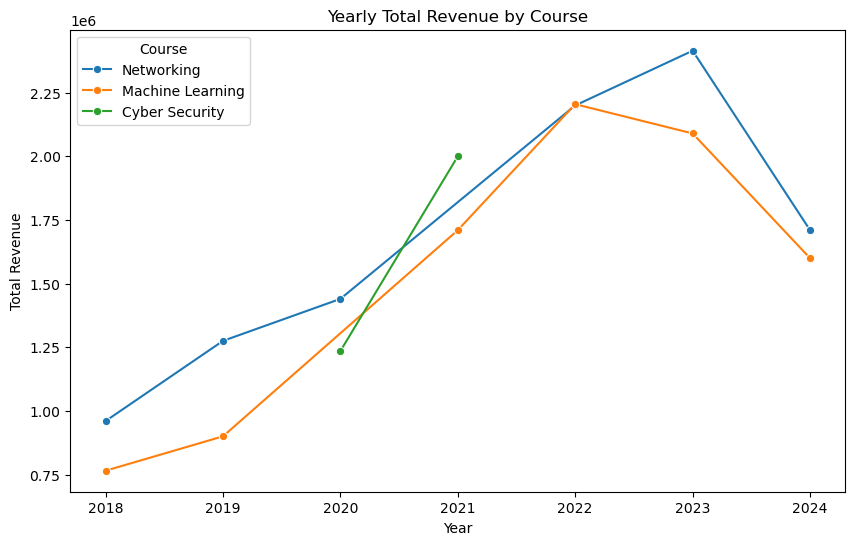

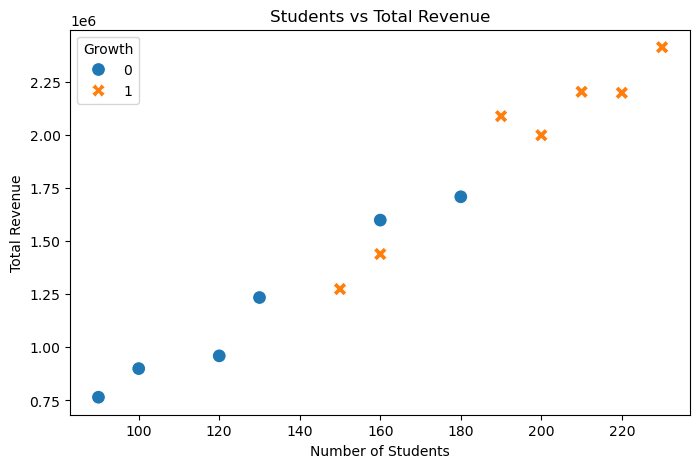

In [28]:
# Line plot: Yearly TotalRevenue by Course
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='TotalRevenue', hue='Course', data=df, marker='o')
plt.title("Yearly Total Revenue by Course")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show() 

# Scatter plot: Students vs TotalRevenue with Growth
plt.figure(figsize=(8,5))
sns.scatterplot(x='Students', y='TotalRevenue', hue='Growth', style='Growth', s=100, data=df)
plt.title("Students vs Total Revenue")
plt.xlabel("Number of Students")
plt.ylabel("Total Revenue")
plt.show()


In [29]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['Course']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Course']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Course'], axis=1, inplace=True)
print("encode ok")


encode ok


In [30]:
# Features & Target
X = df.drop('Growth', axis=1)
y = df['Growth']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("ok")
 
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred, zero_division=0))


✅ ট্রেন-টেস্ট ভাগ সম্পন্ন
✅ মডেল ট্রেনিং সম্পন্ন
Accuracy: 1.0
Confusion Matrix: [[1 0]
 [0 2]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

